In [1]:
# Imports
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [3]:
#normalize pixel values to [0,1]
x_train=x_train.astype("float32")/255.0
x_test=x_test.astype("float32")/255.0

In [4]:
#flatten 28x28 images into 784-dim vectors
x_train=x_train.reshape(-1,784)
x_test=x_test.reshape(-1,784)

In [5]:
#one-hot encode labels
y_train=tf.one_hot(y_train,depth=10)
y_test=tf.one_hot(y_test,depth=10)

In [6]:
#Hyperparameters
input_size=784
hidden_size=256
output_size=10
epochs=10
batch_size=128
learning_rate=0.001

Working on 1 hidden Layer 

In [7]:
#initialize weights and biases
initializer=tf.initializers.GlorotUniform()
W1=tf.Variable(initializer([input_size, hidden_size]))
b1=tf.Variable(tf.zeros([hidden_size]))
gamma1 = tf.Variable(tf.ones([hidden_size]))
beta1 = tf.Variable(tf.zeros([hidden_size]))

W2=tf.Variable(initializer([hidden_size,output_size]))
b2=tf.Variable(tf.zeros([output_size]))

In [8]:
#Batch Norm Fn
def batch_norm(x,gamma,beta,training):
    mean,variance=tf.nn.moments(x,axes=[0])
    if training:
        x_norm=(x - mean)/tf.sqrt(variance+1e-8)
        return gamma*x_norm+beta
    else:
        return x

In [9]:
# leaky relu activation
def leaky_relu(x,alpha=0.01):
    return tf.maximum(alpha*x,x)

In [10]:
#forward pass
def forward_pass(x,training=True):
    z1=tf.matmul(x,W1)+b1
    bn1=batch_norm(z1,gamma1,beta1,training)
    a1=leaky_relu(bn1)
    logits=tf.matmul(a1,W2)+b2
    return logits

In [11]:
#Loss Fn(cross-entropy)
def compute_loss(logits,labels):
    return tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=labels,logits=logits))

In [12]:
#optimizer
optimizer=tf.optimizers.Adam(learning_rate)

In [13]:
#Accuracy Fn
def compute_accuracy(logits,labels):
    predictions=tf.argmax(logits,axis=1)
    true_labels=tf.argmax(labels,axis=1)
    return tf.reduce_mean(tf.cast(tf.equal(predictions,true_labels),tf.float32))

In [14]:

train_losses = []
test_losses = []        # <-- Add this to store test loss
test_accuracies = []

epochs = 10
batch_size = 128

for epoch in range(epochs):
    for i in range(0, len(x_train), batch_size):
        x_batch = x_train[i:i+batch_size]
        y_batch = y_train[i:i+batch_size]

        with tf.GradientTape() as tape:
            logits = forward_pass(x_batch, training=True)
            loss = compute_loss(logits, y_batch)

        gradients = tape.gradient(loss, [W1, b1, gamma1, beta1, W2, b2])
        optimizer.apply_gradients(zip(gradients, [W1, b1, gamma1, beta1, W2, b2]))

    # Evaluate at epoch end
    train_logits = forward_pass(x_train, training=False)
    test_logits = forward_pass(x_test, training=False)

    train_loss = compute_loss(train_logits, y_train)
    test_loss = compute_loss(test_logits, y_test)        # Compute test loss
    test_accuracy = compute_accuracy(test_logits, y_test)

    train_losses.append(train_loss.numpy())               # Store train loss
    test_losses.append(test_loss.numpy())                 # Store test loss
    test_accuracies.append(test_accuracy.numpy())

    print(f"Epoch {epoch+1}, Train Loss: {train_loss.numpy():.4f}, Test Loss: {test_loss.numpy():.4f}, Test Accuracy: {test_accuracy:.4f}")



Epoch 1, Train Loss: 0.5797, Test Loss: 0.5739, Test Accuracy: 0.8916
Epoch 2, Train Loss: 0.3965, Test Loss: 0.4007, Test Accuracy: 0.9270
Epoch 3, Train Loss: 0.2970, Test Loss: 0.3093, Test Accuracy: 0.9418
Epoch 4, Train Loss: 0.2468, Test Loss: 0.2665, Test Accuracy: 0.9473
Epoch 5, Train Loss: 0.2026, Test Loss: 0.2283, Test Accuracy: 0.9532
Epoch 6, Train Loss: 0.1776, Test Loss: 0.2081, Test Accuracy: 0.9553
Epoch 7, Train Loss: 0.1576, Test Loss: 0.1931, Test Accuracy: 0.9554
Epoch 8, Train Loss: 0.1600, Test Loss: 0.2014, Test Accuracy: 0.9464
Epoch 9, Train Loss: 0.1546, Test Loss: 0.1991, Test Accuracy: 0.9457
Epoch 10, Train Loss: 0.1298, Test Loss: 0.1756, Test Accuracy: 0.9537


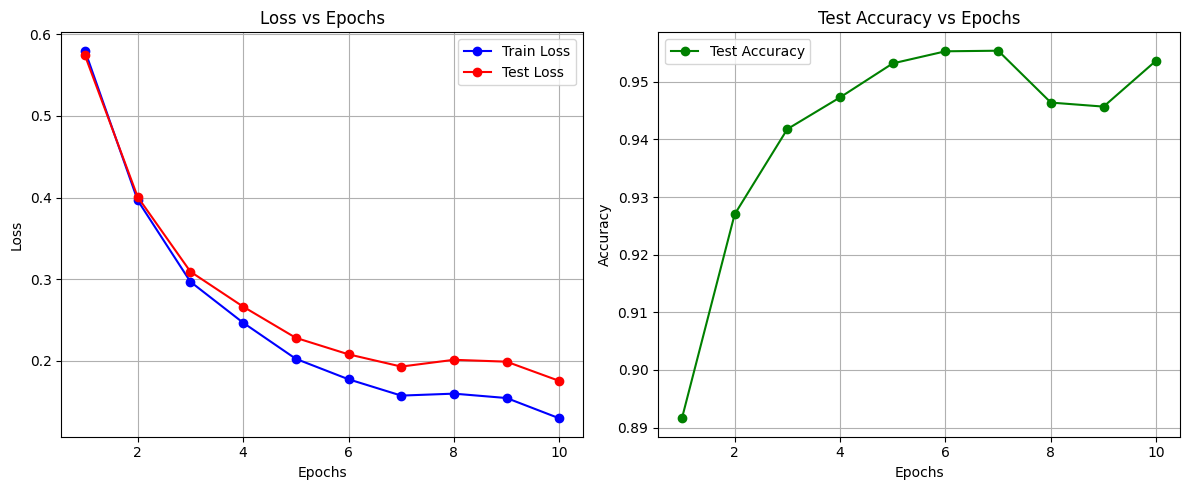

In [15]:
epochs_range = range(1, epochs + 1)

plt.figure(figsize=(12, 5))

# Plot Loss (Train vs Test)
plt.subplot(1, 2, 1)
plt.plot(epochs_range, train_losses, marker='o', color='blue', label='Train Loss')
plt.plot(epochs_range, test_losses, marker='o', color='red', label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs Epochs')
plt.legend()
plt.grid(True)

# Plot Accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs_range, test_accuracies, marker='o', color='green', label='Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Test Accuracy vs Epochs')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()
